In [1]:
sample_orders=None # if None - no voter sampling occurs
search_term="^Hot Shots! .1991." # regular expression for the search term
k=10

## Init

In [2]:
# !pip install simanneal
# !pip install pyarrow

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") 
sys.path.append("../es/") 


import random
myseed = 13
random.seed(myseed)

import es.runner.scenario_runner
from es.runner.view_models import show_cube_grid, SpectrumViewModel
import es.elections
import es.utils
from es.data.movielens_data import *
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

pd.set_option('display.max_rows', 40)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())

Loading BokehJS ...

In [4]:
%%time
idata = es.data.movielens_data.MovielensData(es.data_config.data_movielens_25m) # for GAIW
iframes = es.elections.InstacartDataFrames.from_data(idata, min_popularity=20) # for GAIW

reading instacart data
reading DataFrame order_products__all from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/order_products__all.parquet
order_products__all contains 15630129 items
WARN: Only products with min_popularity=20 considered (137378 approvals filtered from 15630129 to 15492751)
reading DataFrame orders from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/orders.parquet
orders contains 162414 items
reading DataFrame products from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/products.parquet
products contains 62423 items
reading DataFrame departments from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/departments.parquet
departments contains 1 items
reading DataFrame aisles from parquet: /Users/gregaw/code/ddr/esearch/es/../in/movielens_25m/aisles.parquet
aisles contains 1 items
CPU times: user 1.42 s, sys: 740 ms, total: 2.16 s
Wall time: 1.76 s


## Parameters

In [5]:
PARAMS = es.utils.dotdict(dict(
        exp_name='tmp',
        k=k,
        searchterms=[search_term], # for GAIW
        filtering=dict(sample_orders=sample_orders),
        rules=[
            "HUV_0", "HUV_1", "HUV_2", "HUV_3", 
#             "sa.HUV_1", "HUV_2", "sa.HUV_2", "HUV_3", "sa.HUV_3",  # for GAIW
        ], # prefix sa. means 'use simulated annealing'
        anneal_settings= {'tmax': 9900.0, 'tmin': 0.6, 'steps': 50000, 'updates': 10}, # for GAIW
        # anneal_settings={'minutes': 0.5},
        scorer_metrics=['tfidfto2'],
        scorer_funcs = [es.scorers.AgentSpreadScoringStrategy.from_found_df_sorted_nosearchterm]
    ))

## Runner

In [6]:
%%time
_runner = es.runner.scenario_runner.ScenarioRunner(iframes, PARAMS)
exp_folder = _runner.run(verbose=1, include_unity=False)

loaded 62423 products and 162414 orders, (15492751 ops)
2022-06-17 14:13:16.776684
dl=13875, avgdl=1091.5, products=13876 metrics_voter_count=162413, real_voter_count=162413
searching for: ^Hot Shots! .1991. : ['Hot Shots! (1991)']
----------
RUN: exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)
filtered iframes, products: 13875, orders:  1765
processing RULE: HUV_0
Using algo/version: g/4
Using optimised HUV_0
greedy score=67057.75782869327 ([9018.888854878263, 8724.343125944022, 7680.180413712414, 7445.931451446565, 6169.659940872101, 6159.13060883231, 5639.841313108697, 5565.962288032733, 5395.015000844719, 5258.804831021447])
processing RULE: HUV_1
Using algo/version: g/4
added member #0: 3258, total committee score 9018.910, added member delta: 9018.910
added member #1: 428, total committee score 15477.377, added member delta: 6458.467
added member #2: 4605, total committee score 20507.602, added member delta: 5030.224
added member #3: 2717, total committee score 25198.271, added memb

rank                                              HUV_0  HUV_0_id  \
0     1     Naked Gun 2 1/2: The Smell of Fear, The (1991)      3869   
1     2                        Hot Shots! Part Deux (1993)       466   
2     3  Naked Gun: From the Files of Police Squad!, Th...      3868   
3     4                                 Top Secret! (1984)      5500   
4     5  Loaded Weapon 1 (National Lampoon's Loaded Wea...      3208   
5     6                              Police Academy (1984)      2378   
6     7                                  Spaceballs (1987)      3033   
7     8                         Last Boy Scout, The (1991)      7007   
8     9                                    Commando (1985)      6664   
9    10          Naked Gun 33 1/3: The Final Insult (1994)       370   

                                               HUV_1  HUV_1_id  \
0     Naked Gun 2 1/2: The Smell of Fear, The (1991)      3869   
1                        Hot Shots! Part Deux (1993)       466   
2                                 Top Secret! (1984)      5500   
3  Loaded Weapon 1 (National Lampoon's Loaded Wea...      3208   
4                             Major League II (1994)     26870   
5                         Last Boy Scout, The (1991)      7007   
6  Yamakasi - Les samouraÃ¯s des temps modernes (...     42385   
7  Naked Gun: From the Files of Police Squad!, Th...      3868   
8                                 Hudson Hawk (1991)      7000   
9                                Silent Movie (1976)      8512   

                                               HUV_2  HUV_2_id  \
0     Naked Gun 2 1/2: The Smell of Fear, The (1991)      3869   
1                        Hot Shots! Part Deux (1993)       466   
2  Loaded Weapon 1 (National Lampoon's Loaded Wea...      3208   
3                             Major League II (1994)     26870   
4                                 Top Secret! (1984)      5500   
5  Yamakasi - Les samouraÃ¯s des temps modernes (...     42385   
6                                 Hudson Hawk (1991)      7000   
7                                Silent Movie (1976)      8512   
8                                     Freaked (1993)     26861   
9                         Last Boy Scout, The (1991)      7007   

                                               HUV_3  HUV_3_id  
0     Naked Gun 2 1/2: The Smell of Fear, The (1991)      3869  
1  Loaded Weapon 1 (National Lampoon's Loaded Wea...      3208  
2                        Hot Shots! Part Deux (1993)       466  
3                             Major League II (1994)     26870  
4  Yamakasi - Les samouraÃ¯s des temps modernes (...     42385  
5                                 Top Secret! (1984)      5500  
6                                Silent Movie (1976)      8512  
7                                 Hudson Hawk (1991)      7000  
8                                     Freaked (1993)     26861  
9                           Cannonball Run II (1984)      4397

product_id  order_count_found  \
4636        5541               1765   
3258        3869                684   
428          466                926   
3257        3868                978   
4605        5500                463   
2717        3208                185   
1988        2378                454   
2564        3033                845   
5712        7007                233   
5449        6664                262   

                                           product_name  order_count    tf  \
4636                                  Hot Shots! (1991)       1765.0  1765   
3258     Naked Gun 2 1/2: The Smell of Fear, The (1991)       2454.0   684   
428                         Hot Shots! Part Deux (1993)       4238.0   926   
3257  Naked Gun: From the Files of Police Squad!, Th...       5698.0   978   
4605                                 Top Secret! (1984)       1777.0   463   
2717  Loaded Weapon 1 (National Lampoon's Loaded Wea...        543.0   185   
1988                              Police Academy (1984)       2343.0   454   
2564                                  Spaceballs (1987)       7422.0   845   
5712                         Last Boy Scout, The (1991)        934.0   233   
5449                                    Commando (1985)       1189.0   262   

           idf     idfto2        tfidf      tfidfto2       bm25   ratioIn  
4636  4.521992  16.149101  7981.315498  28503.163913  13.390860  1.000000  
3258  4.192423  13.185510  2867.617419   9018.888855  12.166708  0.278729  
428   3.646051   9.421537  3376.243239   8724.343126  10.672141  0.218499  
3257  3.350027   7.852945  3276.326638   7680.180414   9.818363  0.171639  
4605  4.515216  16.081925  2090.544973   7445.931451  12.902439  0.260551  
2717  5.700788  33.349513  1054.645860   6169.659941  15.205291  0.340700  
1988  4.238710  13.566367  1924.374483   6159.130609  12.100920  0.193769  
2564  3.085694   6.674368  2607.411355   5639.841313   9.010946  0.113851  
5712  5.158421  23.888250  1201.912166   5565.962288  14.080433  0.249465  
5449  4.917030  20.591660  1288.261822   5395.015001  13.556781  0.220353

saved election results to results/tmp/exp=tmp,search=^Hot Shots! .1991.,win=10,.csv
saved tfidf results to results/tmp/exp=tmp,search=^Hot Shots! .1991.,win=10,_TFIDF.tsv
Results saved to 'results/tmp'
CPU times: user 2min 1s, sys: 4.98 s, total: 2min 6s
Wall time: 1min 3s


## Visualisation

In [7]:
%%time
es.runner.view_models.show_spectrum_grid(SpectrumViewModel(), PARAMS, exp_folder, plot_side=500, plot_height=50, max_div_value=150)

{'exp_name': 'tmp', 'k': 10, 'searchterms': ['^Hot Shots! .1991.'], 'filtering': {'sample_orders': None}, 'rules': ['HUV_0', 'HUV_1', 'HUV_2', 'HUV_3'], 'anneal_settings': {'tmax': 9900.0, 'tmin': 0.6, 'steps': 50000, 'updates': 10}, 'scorer_metrics': ['tfidfto2'], 'scorer_funcs': [<function AgentSpreadScoringStrategy.from_found_df_sorted_nosearchterm at 0x7fb181103a70>]}
results/tmp/exp=tmp,search=^Hot Shots! .1991.,win=10,.csv
(0) exp_name=tmp;ut_scorer=AgentSpread(tfidfto2)


/Users/gregaw/code/ddr/esearch/es/runner/view_models.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['product_id'].apply(lambda x: id2coord(x))


diversity metrics:  (ar): average rank


CPU times: user 554 ms, sys: 24 ms, total: 578 ms
Wall time: 575 ms


In [8]:
# results
u = _runner.utils
results_df=_runner.get_results_df(exp_folder)
product_counts_df=u.product_count_df
sql("select search_term, algo, algo_version, r.product_id, product_name, rule, rank, order_count from results_df r join product_counts_df c on r.product_id = c.product_id")[:40]

search_term algo  algo_version  product_id  \
0   ^Hot Shots! .1991.    g             4        3869   
1   ^Hot Shots! .1991.    g             4         466   
2   ^Hot Shots! .1991.    g             4        3868   
3   ^Hot Shots! .1991.    g             4        5500   
4   ^Hot Shots! .1991.    g             4        3208   
5   ^Hot Shots! .1991.    g             4        2378   
6   ^Hot Shots! .1991.    g             4        3033   
7   ^Hot Shots! .1991.    g             4        7007   
8   ^Hot Shots! .1991.    g             4        6664   
9   ^Hot Shots! .1991.    g             4         370   
10  ^Hot Shots! .1991.    g             4        3869   
11  ^Hot Shots! .1991.    g             4         466   
12  ^Hot Shots! .1991.    g             4        5500   
13  ^Hot Shots! .1991.    g             4        3208   
14  ^Hot Shots! .1991.    g             4       26870   
15  ^Hot Shots! .1991.    g             4        7007   
16  ^Hot Shots! .1991.    g             4       42385   
17  ^Hot Shots! .1991.    g             4        3868   
18  ^Hot Shots! .1991.    g             4        7000   
19  ^Hot Shots! .1991.    g             4        8512   
20  ^Hot Shots! .1991.    g             4        3869   
21  ^Hot Shots! .1991.    g             4         466   
22  ^Hot Shots! .1991.    g             4        3208   
23  ^Hot Shots! .1991.    g             4       26870   
24  ^Hot Shots! .1991.    g             4        5500   
25  ^Hot Shots! .1991.    g             4       42385   
26  ^Hot Shots! .1991.    g             4        7000   
27  ^Hot Shots! .1991.    g             4        8512   
28  ^Hot Shots! .1991.    g             4       26861   
29  ^Hot Shots! .1991.    g             4        7007   
30  ^Hot Shots! .1991.    g             4        3869   
31  ^Hot Shots! .1991.    g             4        3208   
32  ^Hot Shots! .1991.    g             4         466   
33  ^Hot Shots! .1991.    g             4       26870   
34  ^Hot Shots! .1991.    g             4       42385   
35  ^Hot Shots! .1991.    g             4        5500   
36  ^Hot Shots! .1991.    g             4        8512   
37  ^Hot Shots! .1991.    g             4        7000   
38  ^Hot Shots! .1991.    g             4       26861   
39  ^Hot Shots! .1991.    g             4        4397   

                                         product_name   rule  rank  \
0      Naked Gun 2 1/2: The Smell of Fear, The (1991)  HUV_0     1   
1                         Hot Shots! Part Deux (1993)  HUV_0     2   
2   Naked Gun: From the Files of Police Squad!, Th...  HUV_0     3   
3                                  Top Secret! (1984)  HUV_0     4   
4   Loaded Weapon 1 (National Lampoon's Loaded Wea...  HUV_0     5   
5                               Police Academy (1984)  HUV_0     6   
6                                   Spaceballs (1987)  HUV_0     7   
7                          Last Boy Scout, The (1991)  HUV_0     8   
8                                     Commando (1985)  HUV_0     9   
9           Naked Gun 33 1/3: The Final Insult (1994)  HUV_0    10   
10     Naked Gun 2 1/2: The Smell of Fear, The (1991)  HUV_1     1   
11                        Hot Shots! Part Deux (1993)  HUV_1     2   
12                                 Top Secret! (1984)  HUV_1     3   
13  Loaded Weapon 1 (National Lampoon's Loaded Wea...  HUV_1     4   
14                             Major League II (1994)  HUV_1     5   
15                         Last Boy Scout, The (1991)  HUV_1     6   
16  Yamakasi - Les samouraÃ¯s des temps modernes (...  HUV_1     7   
17  Naked Gun: From the Files of Police Squad!, Th...  HUV_1     8   
18                                 Hudson Hawk (1991)  HUV_1     9   
19                                Silent Movie (1976)  HUV_1    10   
20     Naked Gun 2 1/2: The Smell of Fear, The (1991)  HUV_2     1   
21                        Hot Shots! Part Deux (1993)  HUV_2     2   
22  Loaded Weapon 1 (National Lampoon's Loaded Wea...  HUV_2   

## Tfidf search

In [9]:
product_name_re = PARAMS.searchterms[0]
found_df = u.calc_found_df(u.find_products(product_name_re, min_order_count=1))
display(found_df.sort_values("tfidfto2", ascending=False)[:20])

dl=13875, avgdl=1091.5, products=13876 metrics_voter_count=162413, real_voter_count=162413


product_id  order_count_found  \
4636        5541               1765   
3258        3869                684   
428          466                926   
3257        3868                978   
4605        5500                463   
2717        3208                185   
1988        2378                454   
2564        3033                845   
5712        7007                233   
5449        6664                262   
344          370                607   
3440        4084                333   
3833        4558                231   
3780        4489                487   
5445        6659                352   
2751        3254                312   
2352        2792                299   
482          520                624   
3826        4545                298   
3889        4623                355   

                                           product_name  order_count    tf  \
4636                                  Hot Shots! (1991)       1765.0  1765   
3258     Naked Gun 2 1/2: The Smell of Fear, The (1991)       2454.0   684   
428                         Hot Shots! Part Deux (1993)       4238.0   926   
3257  Naked Gun: From the Files of Police Squad!, Th...       5698.0   978   
4605                                 Top Secret! (1984)       1777.0   463   
2717  Loaded Weapon 1 (National Lampoon's Loaded Wea...        543.0   185   
1988                              Police Academy (1984)       2343.0   454   
2564                                  Spaceballs (1987)       7422.0   845   
5712                         Last Boy Scout, The (1991)        934.0   233   
5449                                    Commando (1985)       1189.0   262   
344           Naked Gun 33 1/3: The Final Insult (1994)       4857.0   607   
3440                        Beverly Hills Cop II (1987)       1875.0   333   
3833                                       Twins (1988)       1059.0   231   
3780                           Coming to America (1988)       3602.0   487   
5445                                     Tremors (1990)       2162.0   352   
2751                             Wayne's World 2 (1993)       1808.0   312   
2352                     Airplane II: The Sequel (1982)       1709.0   299   
482                    Robin Hood: Men in Tights (1993)       5696.0   624   
3826                               Short Circuit (1986)       1728.0   298   
3889                                Major League (1989)       2297.0   355   

           idf     idfto2        tfidf      tfidfto2       bm25   ratioIn  
4636  4.521992  16.149101  7981.315498  28503.163913  13.390860  1.000000  
3258  4.192423  13.185510  2867.617419   9018.888855  12.166708  0.278729  
428   3.646051   9.421537  3376.243239   8724.343126  10.672141  0.218499  
3257  3.350027   7.852945  3276.326638   7680.180414   9.818363  0.171639  
4605  4.515216  16.081925  2090.544973   7445.931451  12.902439  0.260551  
2717  5.700788  33.349513  1054.645860   6169.659941  15.205291  0.340700  
1988  4.238710  13.566367  1924.374483   6159.130609  12.100920  0.193769  
2564  3.085694   6.674368  2607.411355   5639.841313   9.010946  0.113851  
5712  5.158421  23.888250  1201.912166   5565.962288  14.080433  0.249465  
5449  4.917030  20.591660  1288.261822   5395.015001  13.556781  0.220353  
344   3.509722   8.663599  2130.400957   5258.804831  10.143457  0.124974  
3440  4.461534  15.559502  1485.690760   5181.314258  12.517005  0.177600  
3833  5.032817  22.111924  1162.580821   5107.854355  13.726873  0.218130  
3780  3.808653  10.412727  1854.814122   5070.997854  10.908931  0.135203  
5445  4.319109  14.254230  1520.326282   5017.488833  12.159972  0.162812  
2751  4.497921  15.911729  1403.351418   4964.459572  12.564275  0.172566  
2352  4.554234  16.472617  1361.715987   4925.312336  12.683590  0.174956  
482   3.350378   7.854641  2090.636059   4901.296220   9.692611  0.109551  
3826  4.543178  16.360956  1353.866985   4875.564770  12.649756  0.172454  
3889  4.258539  13.732864  

# Analysis

In [10]:
u = es.electionutils.ElectionUtils(iframes)

In [11]:
u.product_count_df.order_count.describe()

count    14194.000000
mean      1091.500000
std       3558.407717
min         20.000000
25%         44.000000
50%        134.000000
75%        563.000000
max      74402.000000
Name: order_count, dtype: float64

In [12]:
found_df.tf.describe()

count    13876.000000
mean        60.987460
std        135.999096
min          1.000000
25%          5.000000
50%         14.000000
75%         47.000000
max       1765.000000
Name: tf, dtype: float64

<AxesSubplot:>

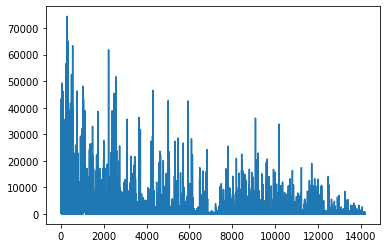

In [13]:
u.product_count_df.order_count.plot()

In [14]:
display(iframes.df_products)
# display(iframes.df_orders)
# display(iframes.df_order_products)

product_id                        product_name          main_genre  \
0               1                    Toy Story (1995)           Adventure   
1               2                      Jumanji (1995)           Adventure   
2               3             Grumpier Old Men (1995)              Comedy   
3               4            Waiting to Exhale (1995)              Comedy   
4               5  Father of the Bride Part II (1995)              Comedy   
...           ...                                 ...                 ...   
62418      209157                           We (2018)               Drama   
62419      209159           Window of the Soul (2001)         Documentary   
62420      209163                    Bad Poems (2018)              Comedy   
62421      209169                 A Girl Thing (2001)  (no genres listed)   
62422      209171      Women of Devil's Island (1962)              Action   

       aisle_id  department_id  
0             1              1  
1             1              1  
2             1              1  
3             1              1  
4             1              1  
...         ...            ...  
62418         1              1  
62419         1              1  
62420         1              1  
62421         1              1  
62422         1              1  

[62423 rows x 5 columns]

## SQL

In [15]:
products = u.product_search
sql(f"select * from products where product_name like 'Hot Shots%' and order_count > 1 order by order_count desc")

product_id                 product_name main_genre  aisle_id  \
0         466  Hot Shots! Part Deux (1993)     Action         1   
1        5541            Hot Shots! (1991)     Action         1   

   department_id    aisle department  order_count  
0              1  default    default       4238.0  
1              1  default    default       1765.0